In [ ]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")

# set seed for reproducibility
np.random.seed(0)

earthquakes['Date'].head()

### Convert our date columns to datetime

In [ ]:
earthquakes[3378:3383]

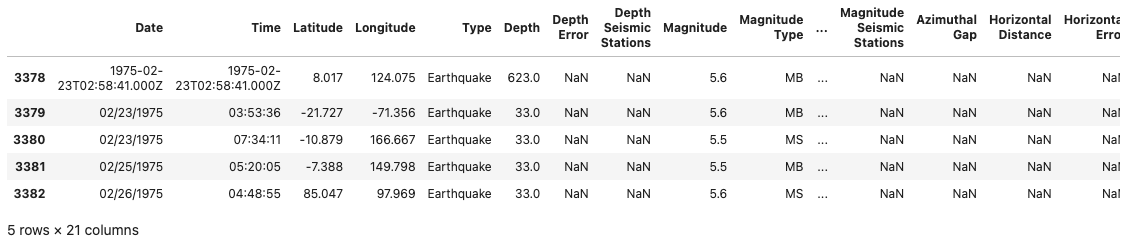

In [ ]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

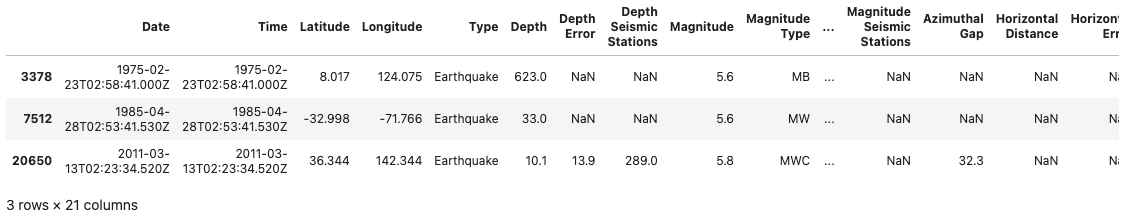

In [ ]:
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

### Select the day of the month

In [ ]:
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

### Plot the day of the month to check the date parsing

In [ ]:
# remove na's
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

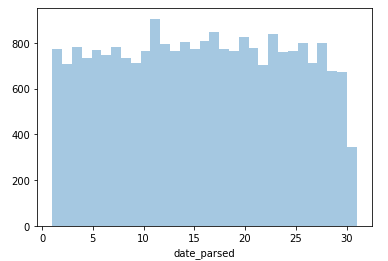